
## 실습내용
-----
- ResNet 사용하여 이미지를 학습하고 10개의 카테고리를 갖는 이미지를 분류하는 이미지 분류기를 생성합니다.
- 데이터셋: [CIFAR](https://pytorch.org/vision/0.9/datasets.html#cifar)




## 주요 코드
----

### ResNet
 - 깊은 신경망(152 layers… ) 학습이 가능하게 하는 skip connections 구조
 - Batch Normalization을 적용
 - 분류기 학습을 위한 FC를 구현하지 않고, GAP(Global Average Pooling)을 수행

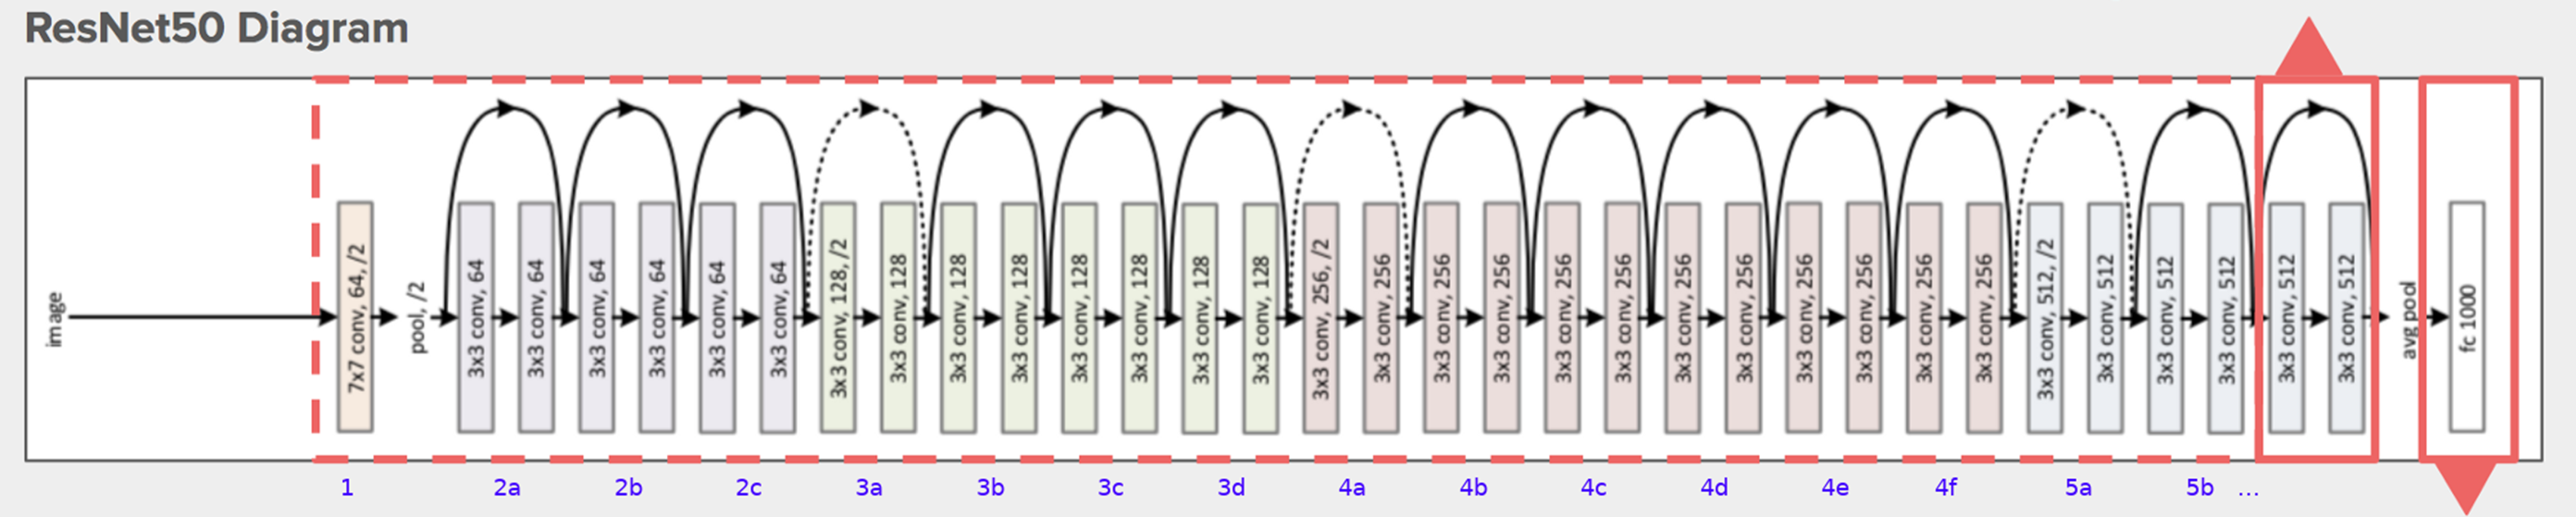


### 모듈
---


```
template/
│
├── train.py 
├── test.py 
├── main.py 
│
├── data_loader/
│   └── data_loaders.py
│
├── data/
│
├── model/ 
│   └── model.py
│
├── saved/
│   ├── models/ 
│   └── log/ 
│  
└── utils/
    ├── util.py
    └── ...
```


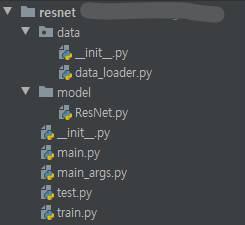

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/github/deeplearning/resnet

In [ ]:
!python main.py

### argparse
----

하이퍼파라미터를 변수로 선언하여 사용할 경우

```
n_epochs = 200
batch_size = 64
lr = 0.0002
b1 = 0.5
b2 = 0.999
n_cpu = 8
latent_dim = 100
img_size = 32
channels = 1
sample_interval = 400
```
필요한 변수를 한꺼번에 사용하고, 코드에서 아래와 같이 사용
```
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))
```


모델을 학습시킬 때 마다 코드를 수정하지 않고, 파이썬 코드를 run할 때 특정 매개변수의 조건을 변경하여 수행하고자 할때, argparse를 사용하면 효과적임

```
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('-gpu', '--gpu', dest='gpu', type=int, default=0)
parser.add_argument('-m', '--momentum', dest='momentum', type=float, default=0.9)
parser.add_argument('-w', '--weight_decay', dest='weight_decay', type=float, default=0.0001)
parser.add_argument('-f', '--factor', dest='factor', type=float, default=0.1)
parser.add_argument('-lr', '--lr', dest='lr', type=float, default=0.1)
parser.add_argument('-b', '--batch_size', dest='batch_size', type=int, default=128)
parser.add_argument('-p', '--patience', dest='patience', type=int, default=5)
parser.add_argument('-e', '--max_epoch', dest='max_epoch', type=int, default=100)

args = parser.parse_args()
print(args)
```

하이퍼파라미터를 사용하는 곳에서 다음과 같이 `args`의 속성값을 호출하여 설정
```
EPOCHS = args.max_epoch
```

In [ ]:
!python main_args.py -e 5

------
**[reference]**
- https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
- https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html
- https://medium.com/@djin31/how-to-plot-wholesome-confusion-matrix-40134fd402a8
